In [12]:
import numpy as np
from numpy.random import rand
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from minorminer import find_embedding

# DWave solution

In [13]:
#genero matrice NxN  simm
N = 60
dim = N
np.random.seed(3)
b = np.random.normal(0,1,(N,N))
Q = (b + b.T)/2

In [14]:
# interazioni
linear={('a'+str(k), 'a'+str(k)):Q[k][k] for k in range(dim)}

quadratic={('a'+str(i+1), 'a'+str(j)):Q[i+1][j] for i in range(dim-1) for j in range(dim-1) if j<i+1}

In [15]:
# passo il problema a dwave
QDwave = dict(linear)
QDwave.update(quadratic)
print(QDwave)

{('a0', 'a0'): 1.7886284734303186, ('a1', 'a1'): 1.3337378194424867, ('a2', 'a2'): -0.7533347935974722, ('a3', 'a3'): -0.12284340561303929, ('a4', 'a4'): 1.103921664604996, ('a5', 'a5'): -1.4935496677890385, ('a6', 'a6'): 0.49558039517689045, ('a7', 'a7'): 0.9606248032998537, ('a8', 'a8'): -1.483316608445911, ('a9', 'a9'): -1.5606012270773397, ('a10', 'a10'): 0.6435548290021997, ('a11', 'a11'): 0.5621498924732614, ('a12', 'a12'): -0.9868333994233407, ('a13', 'a13'): -1.1542589860639245, ('a14', 'a14'): -0.25659048447326804, ('a15', 'a15'): 0.6430152045929345, ('a16', 'a16'): -0.7459110471387337, ('a17', 'a17'): 2.149909566697527, ('a18', 'a18'): 0.395985495617967, ('a19', 'a19'): 0.09992031880757596, ('a20', 'a20'): 0.4178631149745609, ('a21', 'a21'): 0.009356722071302049, ('a22', 'a22'): 2.177734251583515, ('a23', 'a23'): -0.6887997974406604, ('a24', 'a24'): 0.4574116895060476, ('a25', 'a25'): 0.7973305271964934, ('a26', 'a26'): -0.0760819308515329, ('a27', 'a27'): -1.4166559798496592

In [16]:
#definisco numero runs e chain strenght
chainstrength = 1
numruns = 200
# embedding to map problem on Chimera graph
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_qubo(QDwave, chain_strength=chainstrength, num_reads=numruns,\
                              label='QUBO 60 200')

In [17]:
# trovo la soluzione migliore
best=0
for sample, energy, n_occurences, chain_break_freq in response.data():
    sample_list=[]
    for a in range(dim):
        #sample_str.append(str(sample['a'+str(a)]))
        if sample['a'+str(a)]==1:
            sample_list.append(a)
    if best==0:
        best_DWave_val='best D-Wave:'+str(sample_list)+' energy:'+str(energy)+' occurences:'+str(n_occurences)
        best=1
    print(sample_list, energy, n_occurences)
print(best_DWave_val)

[0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 42, 43, 44, 45, 46, 48, 51, 52, 53, 55, 56, 57, 58] -119.64782197642947 1
[0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 42, 43, 44, 45, 46, 48, 51, 52, 53, 55, 56, 57, 58] -119.64782197642944 1
[0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 55, 56, 57, 58] -119.10149870146329 1
[0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 55, 56, 57, 58] -119.10149870146329 1
[0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 55, 56, 57, 58] -119.10149870146329 1
[0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14, 17, 

# Brute Force

In [7]:
def ProbabilisticSamplerQ(Q,plot_limit):
    from itertools import combinations
    import numpy as np
    import pandas as pd
    import random
    import math
    import matplotlib.pyplot as plt
    
    def sum(i_list, Q):
        sum_l=0
        sum_q=0
        for i in (i_list):
            sum_l+=Q[i][i]
        for i in (i_list):
            for j in (i_list):
                if i<j:
                    sum_q+=Q[i][j]
            
        return(sum_l+sum_q)
    
    
    N=len(Q[0])
    t= (2**N)-1
    
    e_min=9999999
    min_list=[]
    plot_data=[]
    for n in range(1,N):  # for groups of items from 1 to N
        print(n)
        for i_list in combinations(np.arange(N), n):
            #print(i_list)
            plot_data.append(sum(list(i_list),Q))  
            #print(list(i_list), sum(list(i_list),Q))
            if sum(list(i_list),Q)<e_min:  

                    e_min=sum(list(i_list),Q)  
                    
                    min_list=list(i_list)
                    print(list(i_list), sum(list(i_list),Q))
    plt.plot(plot_data)
    plt.ylabel('Energy')
    plt.show()
    
    print('Best found:', min_list)
    print('Energy:', e_min)
    print('Possible solutions:', t)
    return

1
[0] 2.4496741602168717
[1] 0.5271204565396003
[2] -0.5422265234913635
[4] -0.6848093815930365
[5] -2.1119258920363557
2
[2, 5] -2.581326788042541
[3, 9] -2.6409301277146113
[4, 9] -3.2382509230628305
[5, 6] -3.705176707448413
3
[2, 4, 6] -4.1428292060861205
[2, 4, 9] -4.781461625562743
[5, 6, 11] -4.865991644796059
[5, 6, 12] -6.135329356388252
4
[1, 5, 6, 12] -6.30874662432178
[2, 5, 6, 12] -7.769823747971026
[5, 6, 11, 12] -8.154311374136459
[6, 11, 12, 14] -8.454283812971354
5
[1, 5, 6, 11, 12] -8.489736813788483
[1, 6, 11, 12, 14] -8.686530807456082
[2, 4, 5, 6, 12] -8.92994785056815
[2, 5, 6, 11, 12] -9.936360169347699
[2, 5, 6, 12, 14] -10.312324560517718
[2, 6, 11, 12, 14] -11.03232033448919
[5, 6, 11, 12, 14] -11.685843303233543
6
[1, 5, 6, 11, 12, 14] -11.96288284951163
[2, 4, 6, 11, 12, 14] -12.194107345670282
[2, 5, 6, 11, 12, 14] -14.191054197266201
7
[2, 4, 5, 6, 11, 12, 14] -14.963606900559036
[2, 5, 6, 11, 12, 14, 17] -15.39830652176026
8
[1, 2, 5, 6, 11, 12, 14, 17] -

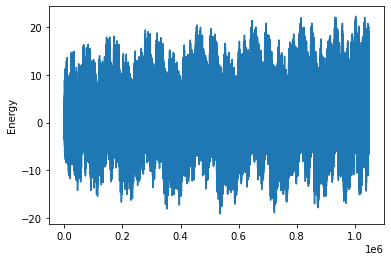

Best found: [1, 2, 4, 5, 6, 11, 12, 14, 17, 19]
Energy: -19.087056207997655
Possible solutions: 1048575


In [8]:
import time
time1=time.time()
ProbabilisticSamplerQ(Q,1000)
time2=time.time()

# GEKKO

In [75]:
c=[Q[k][k] for k in range(N)]

In [19]:
import numpy as np
N = 60
#create square symmetric matrix for the quadratic term

#bias vector for linear term
c=np.zeros(N)
from gekko import GEKKO
m = GEKKO(remote=False)
z = m.Array(m.Var,N,integer=True,lb=0,ub=1,value=1)
m.qobj(c,A=Q,x=z,otype='min')
m.options.SOLVER=1
m.solve(disp=True)
print(z)

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :           60
   Intermediates:            0
   Connections  :           60
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:             60
 Number of total equations: -            0
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             60
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.00 NLPi:   13 Dpth:    0 Lvs:    2 Obj: -1.17E+02 Gap:       NaN
--Integer Solution:  -1.17E+02 Lowest Leaf:  -1.17E+02 Gap:   4.31E-04
Iter